In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,False,False,False,True,True,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,False,False,False,False,False,1150000


In [181]:
plt.style.use('seaborn-whitegrid')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 24 columns):
id                            240000 non-null int32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float32
habitaciones                  217529 non-null float32
garages                       202235 non-null float32
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float32
lat                           116512 non-null float32
lng                           116512 non-null float32
fecha                         240

In [3]:
data['sum'] = 1

<strong><font size="6"> Numero de publicaciones por provincia <strong></font>
 
     

In [173]:
propiedades_por_provincia_cured = data.groupby(['provincia']).agg({'sum':'sum'})
propiedades_por_provincia_cured = propiedades_por_provincia_cured.reset_index()
propiedades_por_provincia_cured = propiedades_por_provincia_cured.sort_values(by='sum',ascending = 'False')
propiedades_por_provincia_cured.head()
#bar plot

,provincia,sum
31,Zacatecas,94
3,Campeche,263
19,Oaxaca,711
28,Tlaxcala,839
26,Tabasco,994


Text(0.5, 0, '')

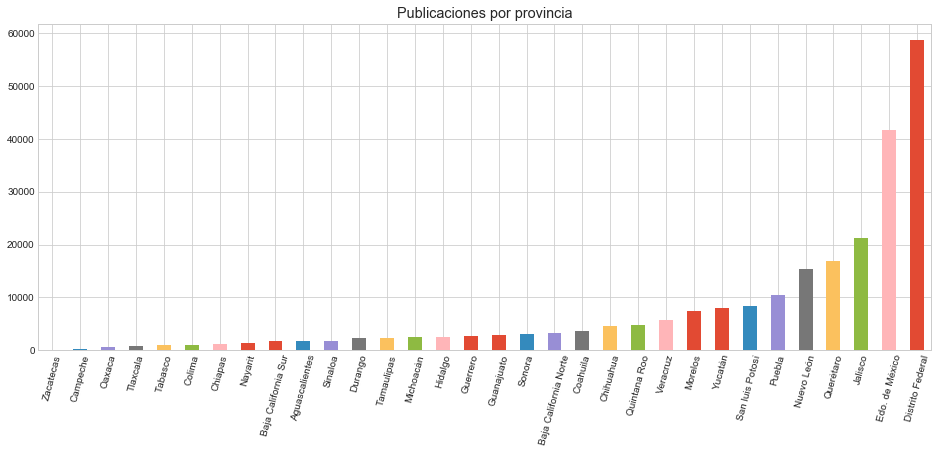

In [182]:
ax = propiedades_por_provincia_cured.plot.bar(x = 'provincia', y= 'sum', title = 'Publicaciones por provincia', legend = False, figsize =[16,6], rot = 75)
ax.xaxis.set_label_text("")

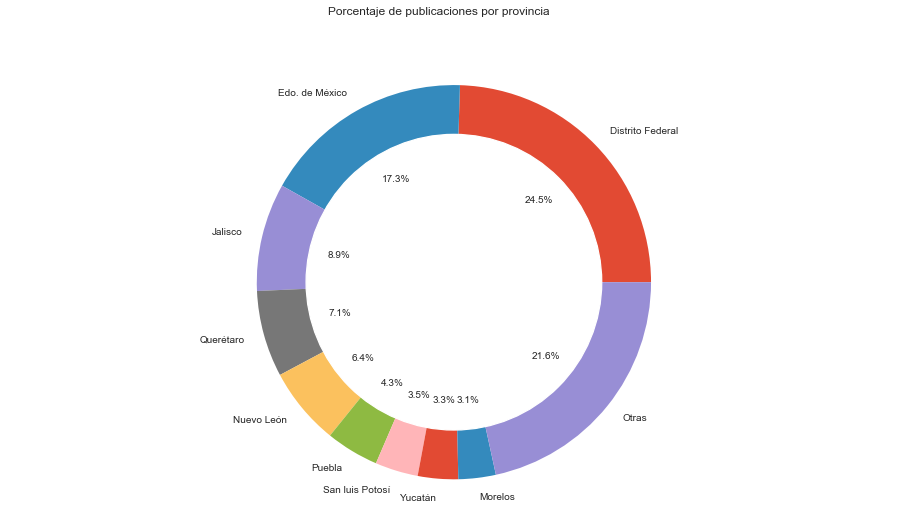

In [183]:
porcentaje_provincias = propiedades_por_provincia_cured.nlargest(9,'sum')
otros = propiedades_por_provincia_cured.nsmallest((data['provincia'].nunique())-9,'sum')
otros['provincia'] = 'Otras'
otros = otros.groupby(['provincia']).agg({"sum":"sum"}).reset_index()
porcentaje_provincias = porcentaje_provincias.append(otros)

plt.pie(porcentaje_provincias['sum'], labels=porcentaje_provincias['provincia'], radius = 1,
        autopct='%1.1f%%')
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(16, 8)
fig.suptitle('Porcentaje de publicaciones por provincia')

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

In [ ]:
#liberar memoria
porcentaje_provincias = None
propiedades_por_provincia_cured = None

<strong><font size="6"> metros cubiertos y totales por provincia <strong></font>
 
     

In [158]:
por_provincia = pd.DataFrame()
por_provincia['provincia'] = data['provincia']
por_provincia['metroscubiertos'] = data['metroscubiertos']
por_provincia['metrostotales'] = data['metrostotales']
por_provincia['precio_en_miles'] = data['precio']/1000
por_provincia = por_provincia.sort_values(by='metroscubiertos',ascending=False)
por_provincia.head()

,provincia,metroscubiertos,metrostotales,precio_en_miles
134483,Jalisco,439.0,NaN,4000.0
173678,Jalisco,439.0,356.0,8950.0
78238,Chihuahua,439.0,NaN,6390.0
62349,Nuevo León,439.0,289.0,4500.0
154520,Nuevo León,439.0,347.0,3300.0


Text(0.5, 1.0, 'metrostotales')

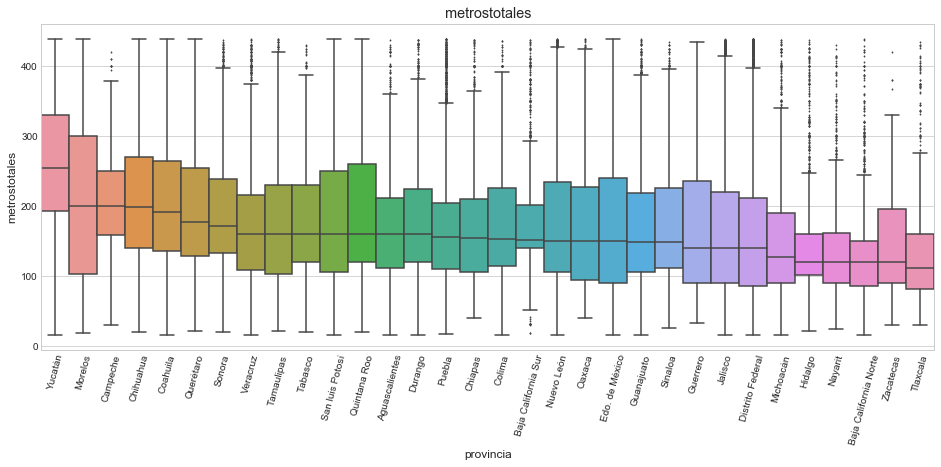

In [192]:
#sns maneja los NaN, no es necesario sacarlos
order = por_provincia.groupby('provincia').agg({'metrostotales':'median'}).sort_values(by='metrostotales',ascending=False).index
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = por_provincia.provincia, y = por_provincia.metrostotales, width = 1, fliersize = 1, order = order)
plt.xticks(rotation=75)
ax.set_title('metrostotales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

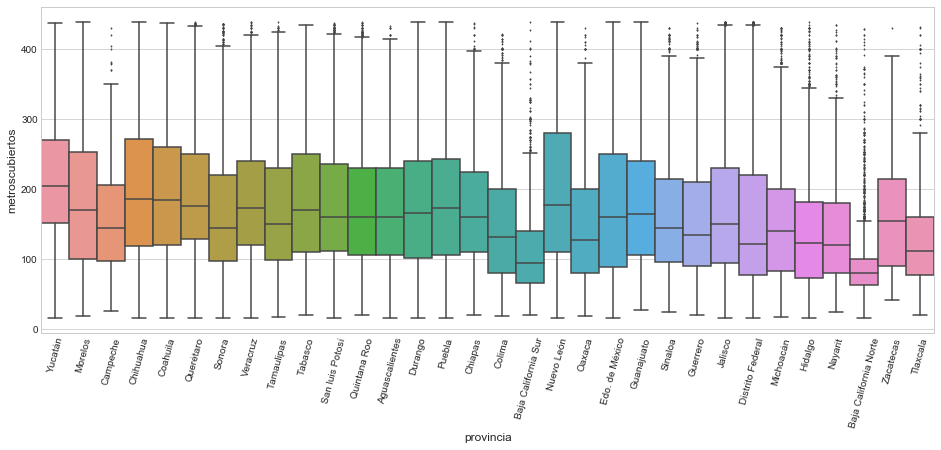

In [189]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = por_provincia.provincia, y = por_provincia.metroscubiertos, width = 1, fliersize = 1, order = order)
plt.xticks(rotation=75)

Text(0.5, 1.0, 'metrostotales')

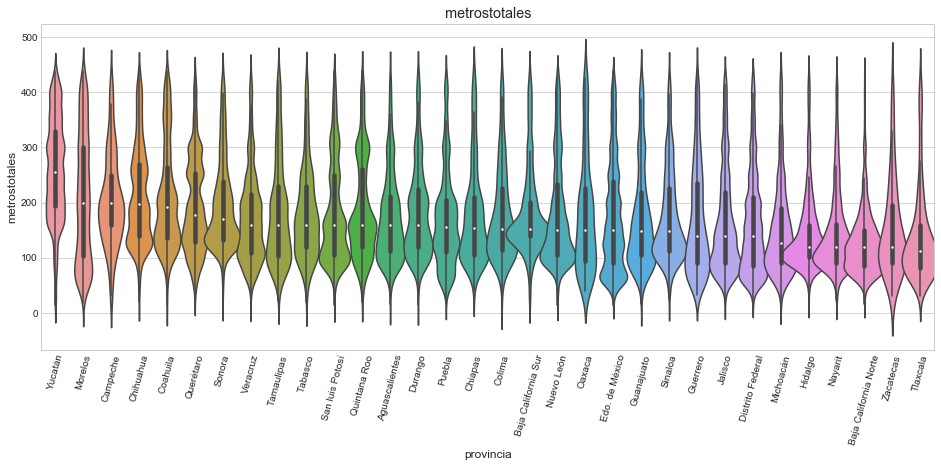

In [191]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = por_provincia.provincia, y = por_provincia.metrostotales, width = 2, fliersize = 1, order = order)
plt.xticks(rotation=75)
ax.set_title('metrostotales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

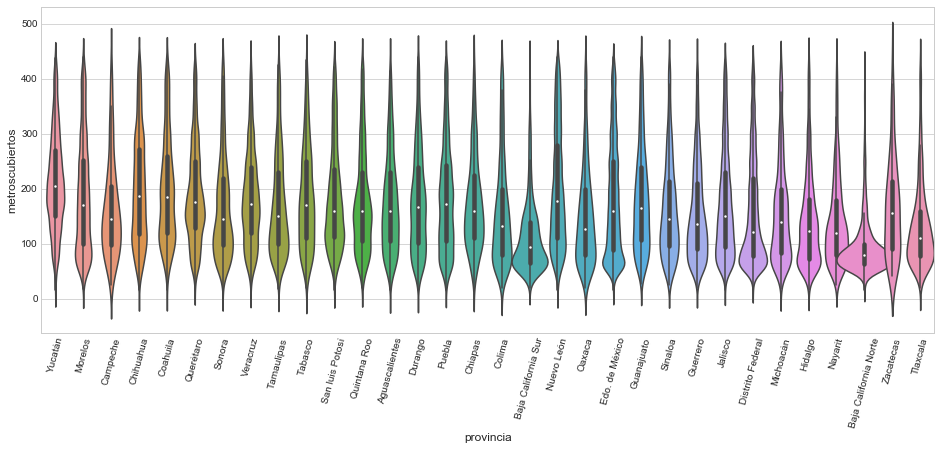

In [188]:
#mismo grafico pero como violin plot
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = por_provincia.provincia, y = por_provincia.metroscubiertos, width = 2, fliersize = 1, order = order)
plt.xticks(rotation=75)

In [194]:
porcentaje_de_cubrimiento = por_provincia.dropna()
porcentaje_de_cubrimiento = porcentaje_de_cubrimiento.groupby('provincia').agg({'metroscubiertos':'mean','metrostotales':'mean'})

porcentaje_de_cubrimiento = porcentaje_de_cubrimiento[(1 -porcentaje_de_cubrimiento['metroscubiertos']) <= porcentaje_de_cubrimiento['metrostotales']]
porcentaje_de_cubrimiento.head()

,metroscubiertos,metrostotales
provincia,,
Aguascalientes,169.563194,166.029167
Baja California Norte,91.728365,126.640110
Baja California Sur,107.727657,177.731879
Campeche,154.141975,203.580247
Chiapas,171.585749,169.135266


<strong>Nota: queda como actividad para el lector buscar una solucion para los casos donde metroscubiertos > metrostotales<strong>

In [ ]:
#necesita correcciones

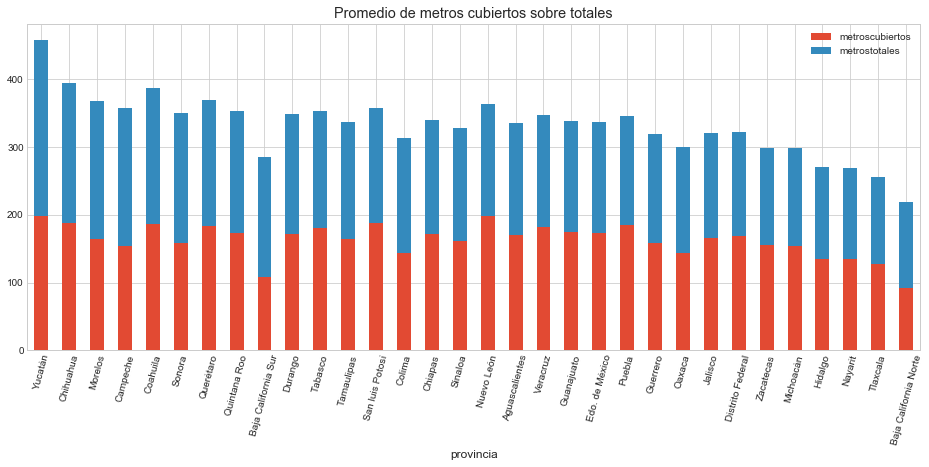

In [195]:
porcentaje_de_cubrimiento.sort_values(by='metrostotales',ascending = False).plot(kind = 'bar',stacked = True, figsize =[16,6], title = 'Promedio de metros cubiertos sobre totales', rot = 75)
#libero mem
porcentaje_de_cubrimiento = None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

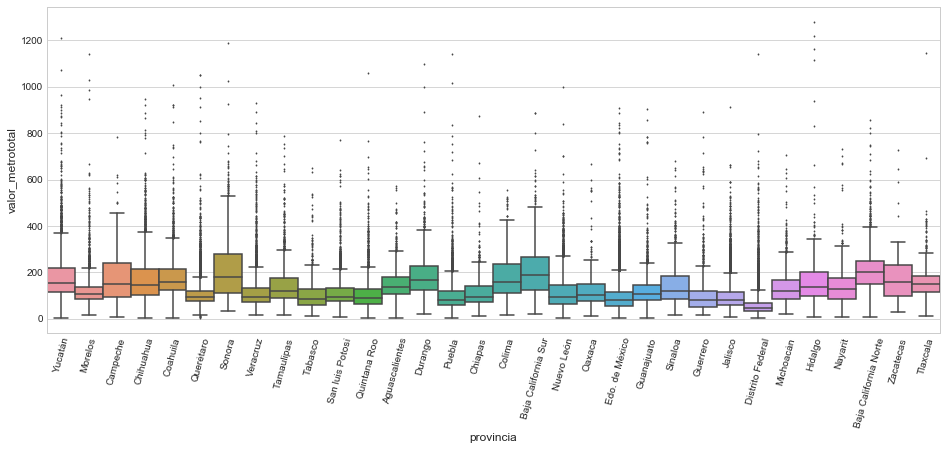

In [196]:
por_provincia_cured = por_provincia.dropna()
por_provincia_cured['valor_metrototal'] = 1000*por_provincia_cured['metrostotales']/por_provincia_cured['precio_en_miles']
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = por_provincia_cured.provincia, y = por_provincia_cured.valor_metrototal, width = 1, fliersize = 1, order = order)
plt.xticks(rotation=75)

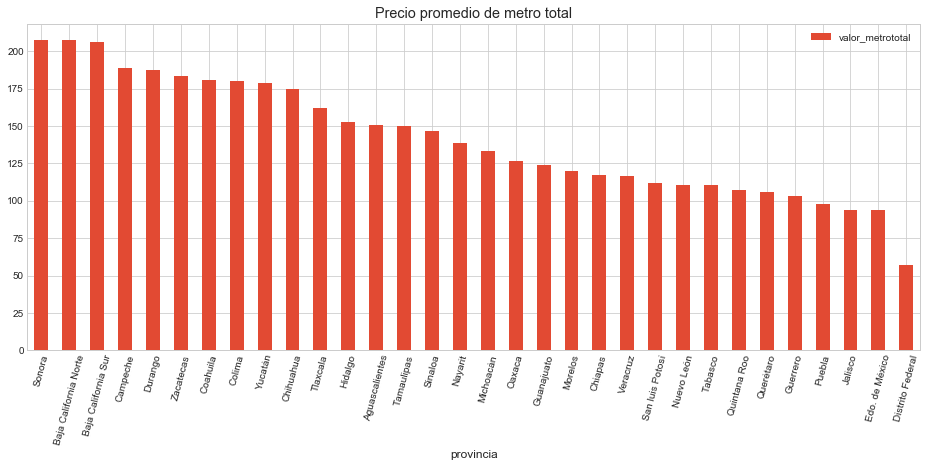

In [197]:
por_provincia_cured.groupby('provincia').\
agg({'valor_metrototal':'mean'}).loc[order].\
sort_values(by='valor_metrototal',ascending = False).\
plot.bar(figsize =[16,6], title = 'Precio promedio de metro total', rot = 75)

<strong><font size="6"> Edad de publicacion por provincia <strong></font>
 
     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

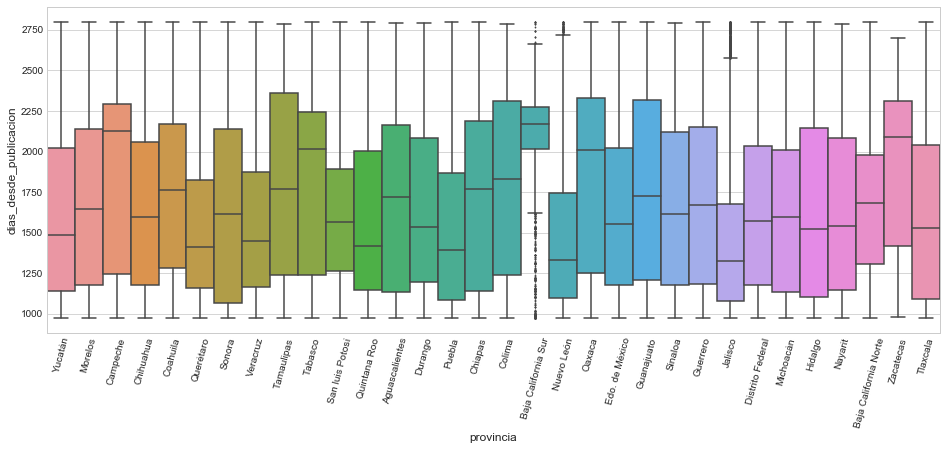

In [198]:
por_provincia = data.dropna(subset = ['fecha'])
por_provincia['dias_desde_publicacion'] = (pd.to_datetime('today') - pd.to_datetime(por_provincia['fecha']))
por_provincia['dias_desde_publicacion'] = por_provincia['dias_desde_publicacion'].dt.days
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = por_provincia.provincia, y = por_provincia.dias_desde_publicacion, width = 1, fliersize = 1, order = order)
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

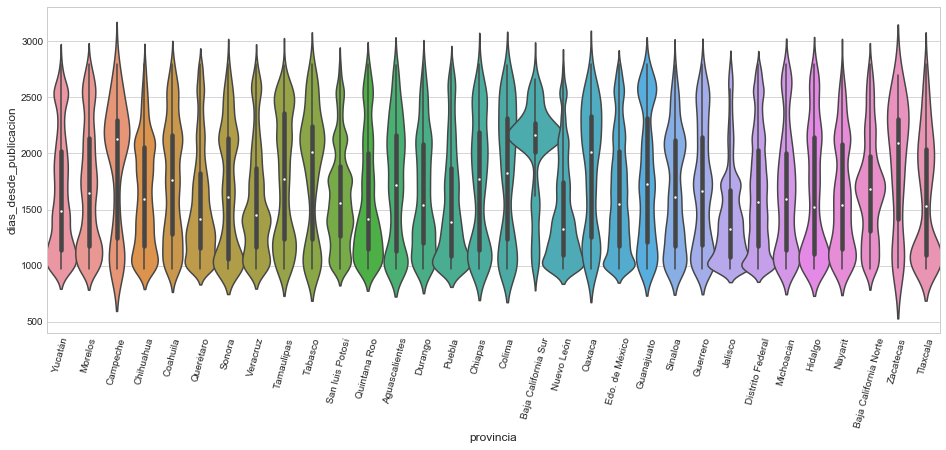

In [200]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = por_provincia.provincia, y = por_provincia.dias_desde_publicacion, width = 2, fliersize = 1, order = order)
plt.xticks(rotation=75)

In [130]:
#numero de habitaciones promedio por provincia